In [25]:
#GENRE CLASSIFICATION

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder 
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report

In [26]:
traind= pd.read_csv("D:/codsoft/Genre Classification Dataset/train_data.txt",sep=':::', names=['S.NO', 'TITLE', 'GENRE', 'DES'], engine='python')
display(traind.head())
print(traind.shape)

,S.NO,TITLE,GENRE,DES
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


(54214, 4)


In [27]:
testd= pd.read_csv("D:/codsoft/Genre Classification Dataset/test_data.txt",sep=':::', names=['S.NO', 'TITLE', 'GENRE', 'DES'], engine='python')
display(testd.head())
print(testd.shape)

,S.NO,TITLE,GENRE,DES
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",NaN
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",NaN
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,NaN
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",NaN
4,5,Er nu zhai (1955),Before he was known internationally as a mart...,NaN


(54200, 4)


In [28]:
solutiond=pd.read_csv("D:/codsoft/Genre Classification Dataset/test_data_solution.txt",sep=':::', names=['S.NO', 'TITLE', 'GENRE', 'DES'], engine='python')
display(solutiond.head())
print(solutiond.shape)

,S.NO,TITLE,GENRE,DES
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


(54200, 4)


In [29]:
top_genre = traind['GENRE'].value_counts().head(20)
top_genre

 drama           13613
 documentary     13096
 comedy           7447
 short            5073
 horror           2204
 thriller         1591
 action           1315
 western          1032
 reality-tv        884
 family            784
 adventure         775
 music             731
 romance           672
 sci-fi            647
 adult             590
 crime             505
 animation         498
 sport             432
 talk-show         391
 fantasy           323
Name: GENRE, dtype: int64

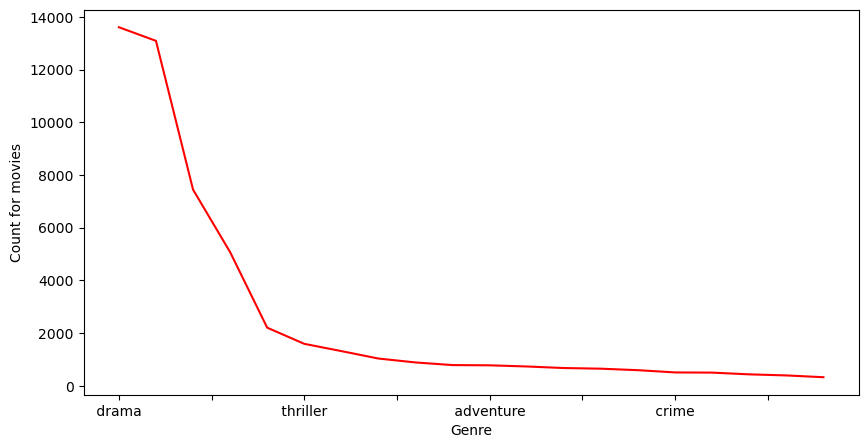

In [30]:
plt.figure(figsize=(10,5))
top_genre.plot(kind = 'line',color='red')
plt.xlabel('Genre')
plt.ylabel('Count for movies')
plt.show()

In [31]:
traind['DES'].fillna("" , inplace=True)
testd['DES'].fillna("" , inplace=True)

In [32]:
t_v = TfidfVectorizer(stop_words='english' , max_features = 100000)
X_train = t_v.fit_transform(traind['DES'])
X_test=t_v.transform(testd['DES'])

In [33]:
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(traind['GENRE'])
y_test = label_encoder.transform(solutiond['GENRE'])

In [34]:
X_train_sub , X_val , y_train_sub , y_val = train_test_split(X_train , y_train , test_size = 0.2 , random_state = 42)
clf = LinearSVC()
clf.fit(X_train_sub , y_train_sub)

LinearSVC()

In [35]:
y_val_pred = clf.predict(X_val)
print("Accuracy score",accuracy_score(y_val , y_val_pred))
print("Classification report\n",classification_report(y_val , y_val_pred))

Accuracy score 0.5836945494789265
Classification report
               precision    recall  f1-score   support

           0       0.44      0.32      0.37       263
           1       0.74      0.44      0.55       112
           2       0.45      0.21      0.28       139
           3       0.47      0.15      0.23       104
           4       0.00      0.00      0.00        61
           5       0.53      0.59      0.56      1443
           6       0.39      0.07      0.11       107
           7       0.69      0.81      0.75      2659
           8       0.56      0.72      0.63      2697
           9       0.36      0.17      0.23       150
          10       0.13      0.03      0.04        74
          11       0.82      0.68      0.74        40
          12       0.00      0.00      0.00        45
          13       0.65      0.66      0.66       431
          14       0.61      0.53      0.57       144
          15       0.25      0.04      0.07        50
          16       0.43 

In [36]:
#Using naive bayes 

In [37]:
from sklearn.naive_bayes import MultinomialNB

In [38]:
Classifier = MultinomialNB()
Classifier.fit(X_train , y_train)

MultinomialNB()

In [39]:
Classifier.predict(X_test)

array([8, 8, 8, ..., 8, 8, 8])

In [40]:
#Logistic regression

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
logisticreg=LogisticRegression(max_iter=50)
logisticreg.fit(X_train , y_train)

C:\Users\DHEEPIKA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=50)

In [44]:
logisticreg.predict(X_test)

array([8, 8, 8, ..., 8, 8, 8])

In [45]:
def predict_movie(des):
    t_v1 = t_v.transform([des])
    pred_label = clf.predict(t_v1)
    return label_encoder.inverse_transform(pred_label)[0]

sample_descr_for_movie = "A movie where police cashes the criminal and shoot him"
print(predict_movie(sample_descr_for_movie))

sample_descr_for_movie1 = "A movie where person cashes a girl too get marry with him but girl refuses him."
print(predict_movie(sample_descr_for_movie1))

 action 
 drama 
